In [130]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import pysal
import pysal.spatial_dynamics.interaction as interaction
np.random.seed(100)
import datetime


from IPython.display import IFrame, Image, HTML, display, YouTubeVideo
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4
from matplotlib.patches import Ellipse, Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import interact, interactive, fixed

import scipy
import treelib
import pyclust
from scipy.spatial.distance import squareform, pdist
import sklearn
from sklearn import preprocessing


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
nearmiss = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/near_miss.csv')

In [7]:
nearmiss.dtypes

i_type               object
incident_with        object
date                 object
p_type               object
details              object
incident_effect      object
injury               object
trip_purpose         object
regular_cyclist      object
helemt               object
intoxicated          object
road_conditions      object
sightlines           object
card_on_roadside     object
riding_on            object
bike_lights          object
terrain              object
direction            object
turning              object
age                 float64
birthmonth          float64
sex                  object
pk                    int64
longitude           float64
latitude            float64
dtype: object

In [11]:
def changetime(x):
    t1 = pd.to_datetime(x, format ='%Y-%m-%dT%H:%M:%S')
    #t2 = pd.Timestamp(np.datetime64(t1))
    t3 = t1.to_pydatetime()
    return t3

                               
nearmiss['date2'] = nearmiss['date'].apply(changetime)

nearmiss['date2'] = nearmiss['date2'].dt.date

nearmiss.head()

,i_type,incident_with,date,p_type,details,incident_effect,injury,trip_purpose,regular_cyclist,helemt,...,terrain,direction,turning,age,birthmonth,sex,pk,longitude,latitude,date2
0,Near collision with moving object or vehicle,"Vehicle, head on",2014-10-08T17:00:00,nearmiss,Vehicle was turning left onto Shelbourne from ...,NaN,No injury,Commute,Y,Y,...,Flat,W,Heading straight,1990,6,F,940,-123.333700,48.436077,2014-10-08
1,Near collision with moving object or vehicle,"Vehicle, rear end",2015-05-27T17:05:00,nearmiss,"Biking along, car was passing me, realized the...",NaN,No injury,During work,Y,Y,...,Flat,W,Heading straight,1982,8,M,1011,-123.334365,48.416741,2015-05-27
2,Near collision with moving object or vehicle,"Vehicle, side",2015-08-06T09:30:00,nearmiss,My children and I were walking our bikes acros...,NaN,No injury,Personal business,Y,Y,...,Flat,E,Heading straight,1975,4,F,1472,-123.315901,48.426492,2015-08-06
3,Near collision with moving object or vehicle,"Vehicle, angle",2015-09-11T17:10:00,nearmiss,After pushing the crosswalk button a grey truc...,NaN,No injury,Commute,Y,Y,...,Flat,NE,Heading straight,1990,7,F,1581,-123.367893,48.463314,2015-09-11
4,Near collision with moving object or vehicle,"Vehicle, side",2015-09-02T09:30:00,nearmiss,car cut in front of me in order to turn left. ...,NaN,No injury,Commute,NaN,NaN,...,Flat,E,Heading straight,NaN,NaN,NaN,1606,-123.344364,48.448219,2015-09-02


In [16]:
ordered_nm = nearmiss.sort_values(by = 'date2') 

ordered_nm.reset_index(inplace=True)

def time_diff(x):
    timesince = x - ordered_nm['date2'][0] 
    return int(timesince.total_seconds() / 36000) #min since first crash #change to hours since first crash

ordered_nm['hrs_since_firstcrash'] = ordered_nm['date2'].apply(time_diff)

ordered_nm.head()

,index,i_type,incident_with,date,p_type,details,incident_effect,injury,trip_purpose,regular_cyclist,...,direction,turning,age,birthmonth,sex,pk,longitude,latitude,date2,hrs_since_firstcrash
0,168,Near collision with moving object or vehicle,"Vehicle, angle",2006-05-18T15:25:00,nearmiss,"Both going south bound, the Driver just cut me...",NaN,No injury,Personal business,Y,...,S,Heading straight,1980,NaN,M,64,-123.316877,48.436412,2006-05-18,0
1,73,Near collision with moving object or vehicle,"Vehicle, side",2012-01-25T16:30:00,nearmiss,Car stopped for pedestian at road cross walk f...,NaN,"Injury, no treatment",Commute,Y,...,SW,Heading straight,1974,8,Other,1397,-123.378820,48.456256,2012-01-25,4987
2,397,Near collision with moving object or vehicle,"Vehicle, head on",2012-03-22T15:40:00,nearmiss,Stopped in time after being cut off by a turni...,NaN,"Injury, no treatment",Commute,Y,...,NE,Heading straight,1988,3,M,2794,-123.335068,48.427355,2012-03-22,5124
3,208,Near collision with moving object or vehicle,"Vehicle, side",2012-06-14T08:30:00,nearmiss,"Car turning right, did not check, was in bike ...",NaN,No injury,Commute,Y,...,NaN,Heading straight,1990,4,F,204,-123.323845,48.431927,2012-06-14,5325
4,149,Near collision with moving object or vehicle,Other,2012-07-05T06:15:00,nearmiss,"I don't like how this is worded. I did not ""ne...",NaN,No injury,Commute,Y,...,SE,Turning right,1977,NaN,M,27,-123.425002,48.451080,2012-07-05,5376


## Scaling the Data

### Determining Knox Test Parameters

In [40]:
nm_st = ordered_nm[['longitude', 'latitude' , 'hrs_since_firstcrash']]

nm_st.head()

nm_scaled_matrix = sklearn.preprocessing.scale(nm_st)

scaled_nm_df = pd.DataFrame(nm_scaled_matrix)
scaled_nm_df.columns = ['x_scaled', 'y_scaled', 'time_scaled']

scaled_nm_df.head()


t = np.array(scaled_nm_df['time_scaled'])
t = t[t != 0 ]

np.mean(np.diff(np.sort(t)))


0.026067699464536576

In [34]:
scaled_nm_df_locations = scaled_nm_df[['x_scaled', 'y_scaled']]


loc_nm = scaled_nm_df_locations.as_matrix()

dist = pdist(loc_nm, 'euclidean')

dist = dist[dist != 0]

np.mean(np.ravel(dist))

1.6273295157785965

## Pysal Interaction Tests

In [35]:
scaled_nm_df.to_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/scaled_nm.csv')

In [37]:
path_nm = "/anaconda/lib/python3.5/site-packages/pysal/examples/Line/Line.shp" 

In [39]:
events_nm = interaction.SpaceTimeEvents(path_nm, 'time_scale')
events_nm.n

events_nm.t[1] - events_nm.t[0]

array([ 6.49714986])

In [102]:
#Knox Test 
result_nm = interaction.knox(events_nm.space, events_nm.t ,delta=1.63,tau= 0.027,permutations=999)
print(result_nm['stat'])

print("%2.2f"%result_nm['pvalue'])

1564
0.04


In [53]:
#Mantel Test

mt_nm = interaction.mantel(events_nm.space, events_nm.t,99,scon=0.0,spow=1.0,tcon=0.0,tpow=1.0)
print("%6.6f"%mt_nm['stat'])

print("%2.2f"%result_nm['pvalue'])

//anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getattr(asarray(obj), method)(*args, **kwds)


0.027596
0.07


In [69]:
#Jacquez Test Near Misses 

result_j_nm = pysal.spatial_dynamics.interaction.jacquez(events_nm.space, events_nm.t, k=15, permutations = 999)

print(result_j_nm['stat'])

print("%3.1f"%result_j_nm['pvalue'])

231
0.4


## Average Distance away in Space Time

In [122]:
y = pdist(nm_scaled_matrix, 'euclidean')

y

np.sort(y)

nm_st_distance = y[y != 0]

np.mean(np.ravel(nm_st_distance))

np.median(np.ravel(nm_st_distance))

np.min(np.ravel(nm_st_distance))

0.0010181824417056149

## KNN Clustering 

## DBSCAN Clustering 

In [134]:
from sklearn.cluster import DBSCAN

cluster = sklearn.cluster.DBSCAN(eps = .3).fit(nm_scaled_matrix) #change that number 

#print(cluster.labels_)

labels = cluster.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

#print('Estimated number of clusters: %d' % n_clusters_)

#print(labels)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(nm_scaled_matrix, labels))

13
Estimated number of clusters: 13
Silhouette Coefficient: -0.105


## Visualization

## Where is Binned Space and Regular Space?

### Visualization based on code from Carson's STA Lecture 4. 

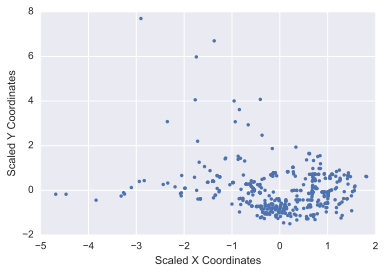

In [137]:
ax = plt.figure(figsize=(6, 4)).gca()
#ax.plot(events.space[:, 0], events.space[:, 1], ".")

ax.plot(np.array(scaled_nm_df['x_scaled']), np.array(scaled_nm_df['y_scaled']), ".")


ax.set_xlabel("Scaled X Coordinates")
ax.set_ylabel("Scaled Y Coordinates")
plt.show()

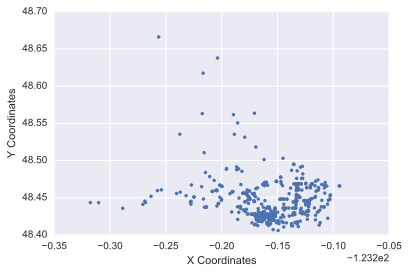

In [142]:
ax = plt.figure(figsize=(6, 4)).gca()
#ax.plot(events.space[:, 0], events.space[:, 1], ".")

ax.plot(np.array(nearmiss['longitude']), np.array(nearmiss['latitude']), ".")


ax.set_xlabel("X Coordinates")
ax.set_ylabel("Y Coordinates")
plt.show()

In [ ]:
## Where in Binned and Regular Time?

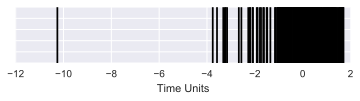

In [143]:
ax = plt.figure(figsize=(6, 1)).gca()
ax.vlines(np.array(scaled_nm_df['time_scaled']), 0, 1)
ax.set_xlabel("Time Units")
plt.tick_params(axis='y', which='both', labelleft='off') 
plt.show()

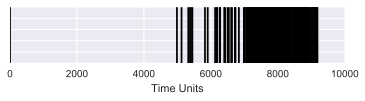

In [145]:
ax = plt.figure(figsize=(6, 1)).gca()
ax.vlines(np.array(ordered_nm['hrs_since_firstcrash']), 0, 1)
ax.set_xlabel("Time Units")
plt.tick_params(axis='y', which='both', labelleft='off') 
plt.show()